In [1]:
from authentication_keys import get_account_credentials
from twitter_no_rl_tool import *
from gather_analysis_helper import *
from time_helpers import *
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
import os, json, sys
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def auth():
    acct_name, consumer_key, consumer_secret, access_token, access_token_secret = get_account_credentials()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    auth_api = API(auth)
    return acct_name, auth_api

In [3]:
def get_tweets(auth_api, target):
    tweets = []
    count = 0
    print("")
    for status_obj in Cursor(auth_api.user_timeline, id=target).items():
        status = status_obj._json
        entry = get_tweet_details(status)
        tweets.append(entry)
        count += 1
        if count % 100 == 0:
            sys.stdout.write('\r')
            sys.stdout.flush()
            sys.stdout.write("%04d"%count)
            sys.stdout.flush
    return tweets

In [4]:
acct_name, auth_api = auth()
print("Signed on with: " + acct_name)

Signed on with: r0zetta_bot3


In [5]:
target = "HalmeRauno"
dirname = os.path.join("../twitter_analysis/user_analysis", target)
if not os.path.exists(dirname):
    print("Creating save dir: " + dirname)
    os.makedirs(dirname)

Creating save dir: ../twitter_analysis/user_analysis/HalmeRauno


In [6]:
userobj = auth_api.get_user(target)
user = userobj._json
save_json(user, os.path.join(dirname, "user_object.json"))

In [7]:
print("Details about the account queried")
print("=================================")
print()
fields = ["id_str", "screen_name", "name", "created_at", "description", "location", "protected", "verified",
          "lang", "followers_count", "friends_count", "statuses_count"]
for f in fields:
    print(f + ": " + str(user[f]))
egg = False
if user["default_profile"] == True and user["default_profile_image"] == True:
    egg = True
print("egg: " + str(egg))
current_unix = get_utc_unix_time()
ca_unix = twitter_time_to_unix(user["created_at"])
age_seconds = current_unix - ca_unix
age_hours = age_seconds / 3600
age_days = age_hours / 24
age_years = age_days/365
msg = "Account age: "  
msg += "%.2f"%age_hours + "(h) " 
msg += "%.2f"%age_days + "(d) " 
msg += "%.2f"%age_years + "(y)"
print(msg)
sc = user["statuses_count"]
tweetsph = sc / age_hours
tweetspd = sc / age_days
print("Tweet speed: " + "%.2f"%tweetsph + "/hour " + "%.2f"%tweetspd + "/day")
print()
print("egg is True if the account has default profile picture and profile settings")
print("statuses_count is the number of tweets published by the account")
# XXX Other stuff to possibly add
# Likes per day
# Friends/followers ratio
# Retweets / replies / quotes / original ratios
# Most liked tweet
# Most retweeted users
# Most quoted users
# Most replied to users
# Image collage

Details about the account queried

id_str: 3030378226
screen_name: HalmeRauno
name: Rauno Halme
created_at: Wed Feb 11 13:54:34 +0000 2015
description: Faktantarkastaja, Operation Libero
location: 
protected: False
verified: False
lang: None
followers_count: 23
friends_count: 11
statuses_count: 3155
egg: False
Account age: 41997.73(h) 1749.91(d) 4.79(y)
Tweet speed: 0.08/hour 1.80/day

egg is True if the account has default profile picture and profile settings
statuses_count is the number of tweets published by the account


In [8]:
tweets = []
saved_tweets_file = os.path.join(dirname, "tweets.json")
if not os.path.exists(saved_tweets_file):
    print("Retrieving tweets from Twitter.")
    tweets = get_tweets(auth_api, target)
    save_json(tweets, saved_tweets_file)
else:
    print("Loading saved tweets. Please delete " + saved_tweets_file + " if you want to fetch new tweets.")
    tweets = load_json(saved_tweets_file)
print("")
print("Got " + str(len(tweets)) + " tweets.")

Retrieving tweets from Twitter.

3100
Got 3155 tweets.


In [9]:
full = get_counters_and_interactions2(tweets)

Processed 3155 tweets.
Found 1 users.
Found 0 susp_users.
Found 27 hashtags.
Found 95 urls.
Found 44 domains.
Found 2 sources.
Found 1 amplifiers.
Found 1350 influencers.
Found 1 repliers.
Found 832 replied_to.
Found 0 quoted.
Found 0 quoters.
Found 8 retweeted.
Found 1 retweeters.
Found 1342 mentioned.
Found 1 mentioners.
Found 24 original tweets.
Found 0 suspicious tweets.
Found 0 suspicious original tweets.
Found 8 retweets.
Found 0 quote tweets.
Found 3123 replies.
Found 9 user details.


In [10]:
collect_start = unix_time_to_readable(full["oldest"])
collect_end = unix_time_to_readable(full["newest"])
print("Collection started on " + collect_start + " and ended on " + collect_end)

num_tweets = len(tweets)
timespan_s = full["timespan"]
timespan_10m = timespan_s/600
timespan_m = timespan_s/60
timespan_h = timespan_m/60
timespan_d = timespan_h/24
high_vol = timespan_d*40
print("Collection duration: " + "%.2f"%timespan_d + " days.")

Collection started on 2015-02-11 14:23:43 and ended on 2019-11-27 11:24:14
Collection duration: 1749.88 days.


In [11]:
uf = full["user_fields"]
counters = full["counters"]
omit = ['users', 'susp_users', 'amplifiers', 'mentioners', 'quoters', 'repliers', 'retweeters']
for o in omit:
    if o in counters:
        del(counters[o])
print("Below is a list of counters collected from the account's last " + str(num_tweets) + " tweets.")
print()
print("influencers = whenever the examined account interacts in any way (reply, mention, retweet) with another account, this counter is incremented")
print_counters(counters, uf, 50)

Below is a list of counters collected from the account's last 3155 tweets.

influencers = whenever the examined account interacts in any way (reply, mention, retweet) with another account, this counter is incremented

influencers (1350)
---------
381	https://twitter.com/sekoomus
355	https://twitter.com/hopeantikainen
326	https://twitter.com/JunesLokka
292	https://twitter.com/Halla_aho
221	https://twitter.com/jaakkotuominen2
220	https://twitter.com/PetraNyqvist
212	https://twitter.com/veitera
167	https://twitter.com/SwanOfTuonela
165	https://twitter.com/hunttis
156	https://twitter.com/MariaOhisalo
150	https://twitter.com/TereSammallahti
122	https://twitter.com/iiris_suomela
122	https://twitter.com/KP_keto
118	https://twitter.com/Kai66271903
115	https://twitter.com/pommi_tommi
114	https://twitter.com/AndeVirtanen
113	https://twitter.com/Uuninpankkopoik
105	https://twitter.com/TTingander
104	https://twitter.com/karhumestari
102	https://twitter.com/AnteroKoski
101	https://twitter.com/Laura

In [12]:
sn_rsn = full["sn_rsn"]
rsn_sn = full["rsn_sn"]
sn_rep = full["sn_rep"]
rep_sn = full["rep_sn"]
twid_count = full["twid_count"]
twid_rtc = full["twid_rtc"]
twid_text = full["twid_text"]
twid_url = full["twid_url"]
twid_sn = full["twid_sn"]
sn_twid = full["sn_twid"]

In [13]:
print("Suspicious original tweets")
print("==========================")
print("These can include:")
print(" - tweets that were retweeted more than liked")
print(" - tweets that look like follow trains")
print(" - tweets that are mostly, or all hashtags, and an image")
print()
for twid in full["susp_orig_twids"]:
    print(twid_url[twid] + "\t" + twid_text[twid])

Suspicious original tweets
These can include:
 - tweets that were retweeted more than liked
 - tweets that look like follow trains
 - tweets that are mostly, or all hashtags, and an image



In [14]:
print("Suspicious retweets")
print("===================")
print("These can include:")
print(" - tweets that were retweeted more than liked")
print(" - tweets that look like follow trains")
print(" - tweets that are mostly, or all hashtags, and an image")
print()
for twid in full["susp_twids"]:
    print(twid_url[twid] + "\t" + twid_text[twid])

Suspicious retweets
These can include:
 - tweets that were retweeted more than liked
 - tweets that look like follow trains
 - tweets that are mostly, or all hashtags, and an image



In [15]:
print("Top 20 tweets that received the most retweets (from everyone on Twitter)")
print()
print("The number preceding the tweet is the number of retweets it received.")
print()
print_tweet_texts(twid_rtc, twid_text, twid_url, 20)

Top 20 tweets that received the most retweets (from everyone on Twitter)

The number preceding the tweet is the number of retweets it received.

10510	RT @MrAndyNgo: The elderly woman with a walker who was accosted by antifa militants in Hamilton, Canada has spoken out in a new clip: https…	https://twitter.com/HalmeRauno/status/1190904931605196800	[1190904931605196800]
10510	The elderly woman with a walker who was accosted by antifa militants in Hamilton, Canada has spoken out in a new cl… https://t.co/SMeEELyhsC	https://twitter.com/MrAndyNgo/status/1179133508238708736	[1179133508238708736]
578	RT @ZonePhysics: @elonmusk 😀😀 https://t.co/aAijhWikga	https://twitter.com/HalmeRauno/status/1163757244971962370	[1163757244971962370]
578	@elonmusk 😀😀 https://t.co/aAijhWikga	https://twitter.com/ZonePhysics/status/1163005003088502784	[1163005003088502784]
75	RT @JunnuPeltola: -Pyydetään anteeksi 30 vuotta vanhasta huumorista, joka nauratti yli puolta Suomea.-Poistetaan entisen presidentin kuvia…

Interarrivals are counts of time deltas between tweets.

We measure the time between the previous tweet and the current tweet (in seconds). We record how many times each time delta is observed and plot a graph. Accounts that have large counts of the same time delta between tweets can be indicative of automation.

Text(0.5, 1.0, 'Interarrivals')

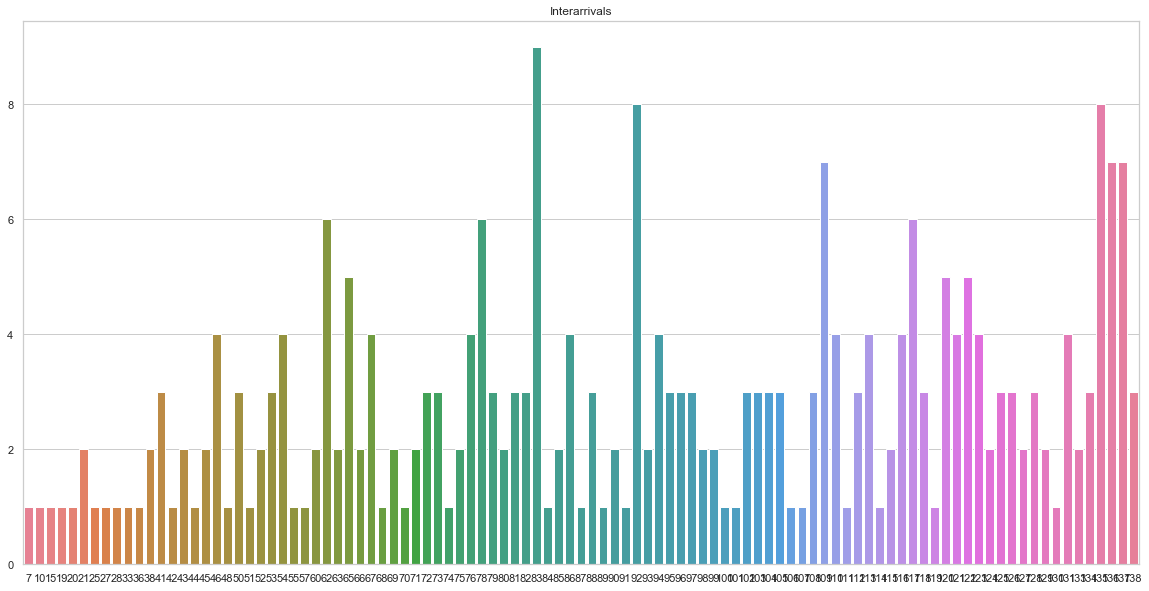

In [16]:
plot_data = make_interarrivals_plot_data(tweets)
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="whitegrid")
plt.figure()
ax = sns.barplot(x="deltas", y="counts", palette="husl", data=plot_data)
ax.set_title("Interarrivals")

In [17]:
print("Number of tweets observed per day")
print()
tweet_counts = get_sorted_tweet_counts(tweets)
print_tweet_counts(tweet_counts)

Number of tweets observed per day

17	2019-11-27
29	2019-11-26
3	2019-11-25
50	2019-11-24
95	2019-11-23
43	2019-11-22
22	2019-11-21
18	2019-11-20
13	2019-11-19
46	2019-11-18
23	2019-11-17
9	2019-11-16
7	2019-11-15
29	2019-11-14
11	2019-11-13
34	2019-11-12
22	2019-11-11
14	2019-11-10
44	2019-11-09
11	2019-11-08
49	2019-11-07
14	2019-11-06
35	2019-11-05
61	2019-11-04
27	2019-11-03
59	2019-11-02
2	2019-11-01
59	2019-10-31
24	2019-10-30
27	2019-10-29
16	2019-10-28
39	2019-10-27
25	2019-10-26
45	2019-10-25
13	2019-10-24
28	2019-10-23
62	2019-10-22
44	2019-10-21
32	2019-10-20
17	2019-10-19
18	2019-10-18
16	2019-10-17
13	2019-10-16
4	2019-10-15
1	2019-10-14
9	2019-10-13
29	2019-10-12
25	2019-10-11
9	2019-10-10
28	2019-10-09
7	2019-10-08
3	2019-10-07
9	2019-10-06
6	2019-10-05
16	2019-10-04
49	2019-10-03
50	2019-10-02
50	2019-10-01
9	2019-09-30
17	2019-09-29
24	2019-09-28
10	2019-09-27
6	2019-09-26
6	2019-09-25
8	2019-09-24
15	2019-09-23
12	2019-09-22
4	2019-09-21
41	2019-09-20
39	2019-09-19
11

166


Text(0.5, 1.0, 'Tweet counts')

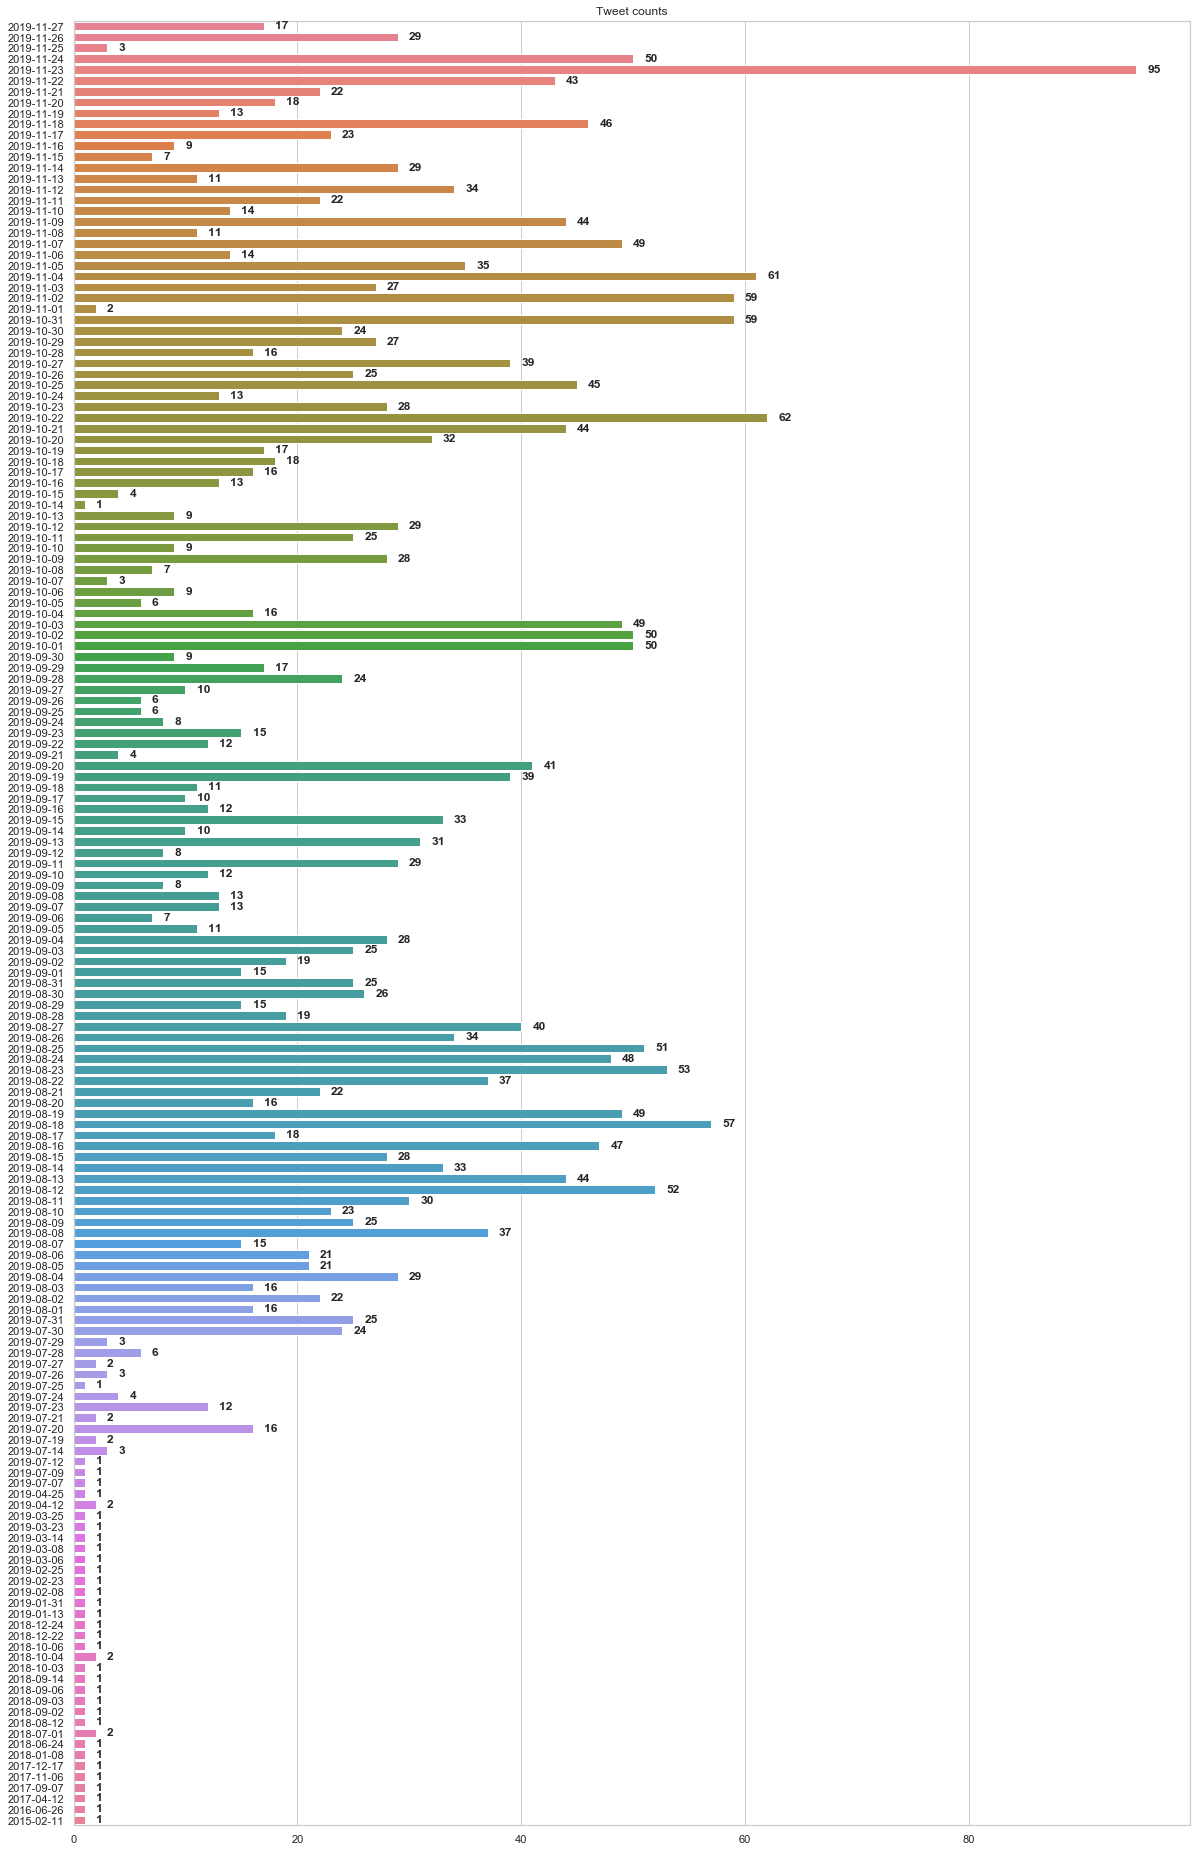

In [18]:
plot_data = get_tweet_counts_plot_data(tweets)
num_cols = len(plot_data["date"])
print(num_cols)
height = num_cols/5
sns.set(rc={'figure.figsize':(20,height)})
sns.set(style="whitegrid")
plt.figure()
ax = sns.barplot(y="date", x="count", palette="husl", data=plot_data)
for i, v in enumerate(plot_data["count"]):
    ax.text(v+1, i+0.25, str(v), fontweight='bold')
ax.set_title("Tweet counts")
#ax.yaxis.set_major_locator(plt.MaxNLocator(20))

In [19]:
print("All captured tweets from the target account, from most recent to least recent.")
print()
print("Note - for accounts that have published more than 3200 tweets, this is roughly the last 3200 tweets.")
print()
for t in tweets:
    twid = t["id_str"]
    ds = t["created_at"]
    text = twid_text[twid][:100]
    url = twid_url[twid]
    print(ds+ "\t" + text + "\t" + url)

All captured tweets from the target account, from most recent to least recent.

Note - for accounts that have published more than 3200 tweets, this is roughly the last 3200 tweets.

Wed Nov 27 11:24:14 +0000 2019	@lahti_tomi @vehkoo @MartinScheininF Väite perustuu kommentiisi, että joku olisi "paniikissa", kun t	https://twitter.com/HalmeRauno/status/1199650133379559424
Wed Nov 27 09:16:28 +0000 2019	@lahti_tomi @vehkoo @MartinScheininF Vaikutat olevan harhainen, ota yhteys alan ammatilaiseen! https	https://twitter.com/HalmeRauno/status/1199617980230963207
Wed Nov 27 08:58:08 +0000 2019	@lahti_tomi @vehkoo @MartinScheininF Niin moni muukin, Pravdaksi Hesaria jo vuosikymmeniä. Persukiel	https://twitter.com/HalmeRauno/status/1199613363787091970
Wed Nov 27 08:13:26 +0000 2019	@WVastaranta Lammashan on myös hyvin suostuvainen eläin. Kun kysyy laumalta, että kuka haluaa tänään	https://twitter.com/HalmeRauno/status/1199602117092225024
Wed Nov 27 08:10:18 +0000 2019	@lahti_tomi @MikkoVuorenpaa

Tue Jul 23 06:00:12 +0000 2019	@KoomikkoKivi Faktat ja Ilkka Kivi eivät näköjään koskaan kohtaa. Kieltomerkkihän löytyi lipun päält	https://twitter.com/HalmeRauno/status/1153545326961340416
Tue Jul 23 03:41:16 +0000 2019	@hopeantikainen @panuraatikainen @Halla_aho @persut "Rasismiksi voidaan luonnehtia valta- ja alistus	https://twitter.com/HalmeRauno/status/1153510362337173504
Sun Jul 21 19:04:16 +0000 2019	@Dimmu141 @pasimakslahti Huhut!	https://twitter.com/HalmeRauno/status/1153017868704997381
Sun Jul 21 18:34:41 +0000 2019	@Dimmu141 @pasimakslahti Jännästi näidenkin huhujen takaa löytyy taitava venäläistrolli.	https://twitter.com/HalmeRauno/status/1153010422297059328
Sat Jul 20 13:35:23 +0000 2019	@TiiaMaija @pekka_perala @sekoomus @Natsivahti1 @Halla_aho Ai Antifan liput? Enpä usko.	https://twitter.com/HalmeRauno/status/1152572715250987008
Sat Jul 20 13:33:17 +0000 2019	@sekoomus @pekka_perala @TiiaMaija @Natsivahti1 @Halla_aho Jännästi jää taas tärkeä osa uutisesta la	https://twit

The following few cells show at which times of the day tweets were published. This can be useful for identifying the timezone the account holder lives in. All times are in UTC.

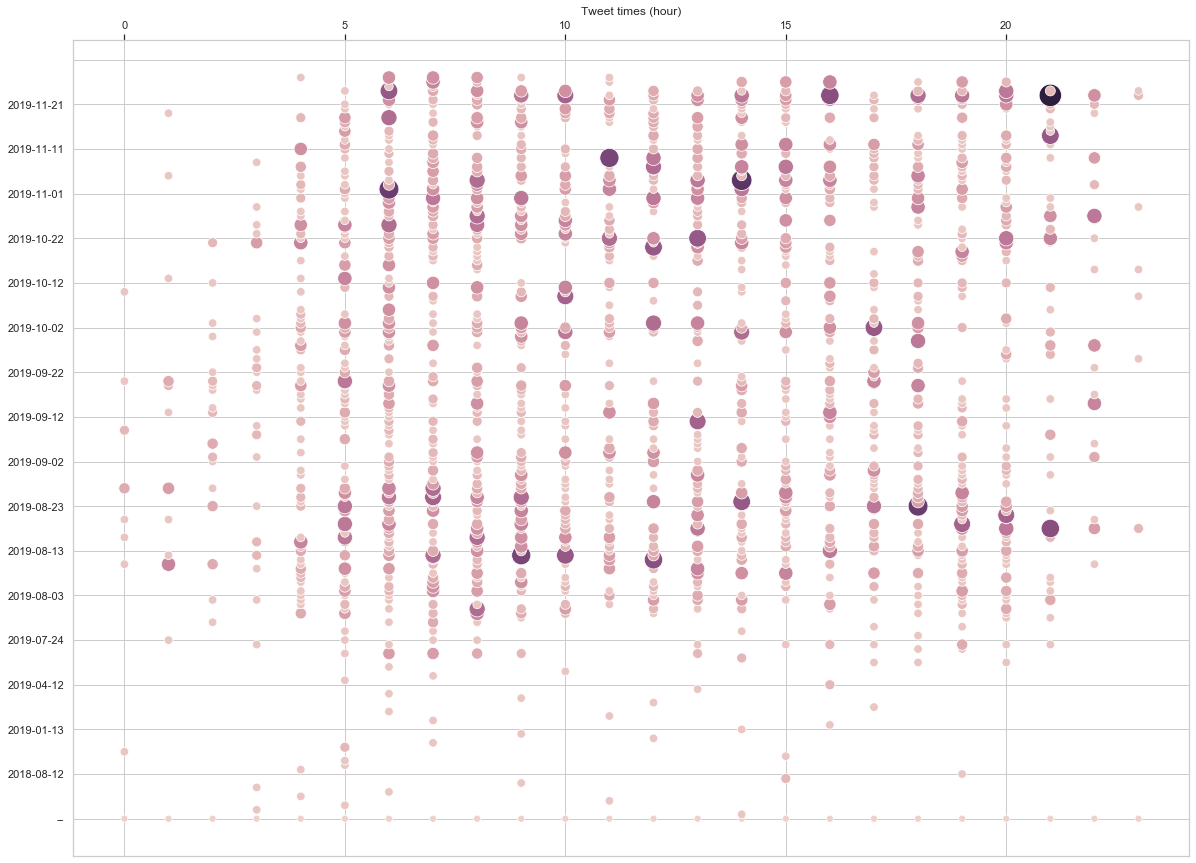

In [20]:
plot_data = get_tweet_counts_scatter_plot_data(tweets)
sns.set(rc={'figure.figsize':(20,15)})
sns.set(style="whitegrid")
plt.figure()
ax = sns.scatterplot(x="hour", y="date", size="count", hue="count", sizes=(50, 500), data=plot_data, legend=False)
ax.xaxis.set_ticks_position('top')
ax.set_title("Tweet times (hour)")
ax.yaxis.set_major_locator(plt.MaxNLocator(20))

In [21]:
heatmap = make_short_heatmap(tweets)
print_short_heatmap(heatmap)


   00| 01| 02| 03| 04| 05| 06| 07| 08| 09| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|
--------------------------------------------------------------------------------------------------
M|  2|  1|  4|  9| 17| 34| 37| 31| 22| 40| 23| 16| 18| 27| 38| 24| 14| 14| 16| 22| 11|  3|  1|  0|
T|  4|  7|  3|  5| 13| 20| 28| 37| 35| 34| 25| 25| 21| 23| 26| 25| 33| 13| 29| 22| 23| 13|  8|  2|
W|  1|  1|  1|  3| 13| 16| 33| 30| 41| 34| 39| 16| 22| 25| 18| 12| 21| 17| 15| 15| 21|  3|  0|  2|
T|  1|  2|  2|  4| 22| 24| 24| 24| 33| 36| 17| 15| 27| 27| 28| 34| 22| 11| 33| 23| 22| 18|  2|  0|
F|  2|  4| 11|  7| 17| 47| 42| 18| 33| 19| 15| 22| 16| 30| 25| 15| 28| 26| 19| 20| 14|  9|  1|  0|
S|  1|  6|  5|  0| 13| 14| 32| 36| 26| 22| 25| 33| 25| 30| 27| 22| 30| 16| 24| 31| 28| 23| 16|  2|
S|  0|  1|  2|  4| 12| 21| 49| 35| 48| 34| 19| 16| 35| 22| 18| 21| 11| 17| 25| 21| 23| 24| 19|  3|



Text(0.5, 1, 'Combined heatmap')

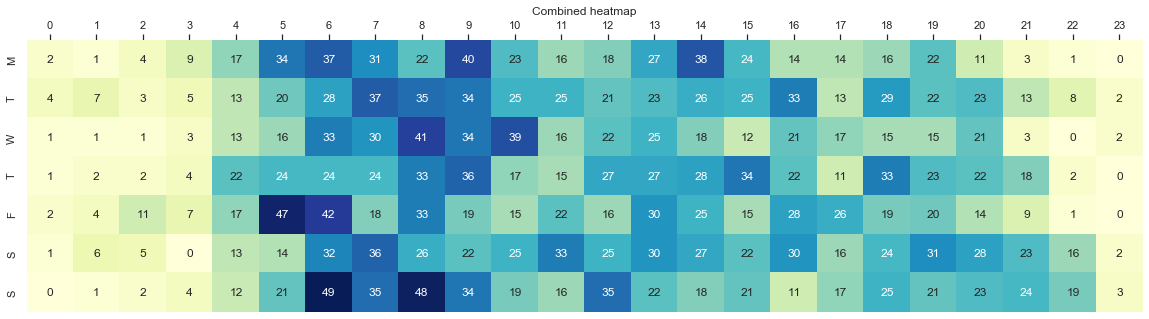

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set(style="whitegrid")
hm = np.array(heatmap)
days = ["M", "T", "W", "T", "F", "S", "S"]
plt.figure()
ax = sns.heatmap(hm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, yticklabels=days)
ax.xaxis.set_ticks_position('top')
ax.set_title("Combined heatmap")

In [23]:
long_hm = make_long_heatmap(tweets)

In [24]:
print_long_heatmap(long_hm)

Week 52

   00| 01| 02| 03| 04| 05| 06| 07| 08| 09| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|
--------------------------------------------------------------------------------------------------
M|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
T|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
W|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
T|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
F|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
S|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
S|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|

Week 51

   00| 01| 02| 03| 04| 05| 06| 07| 08| 09| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21|

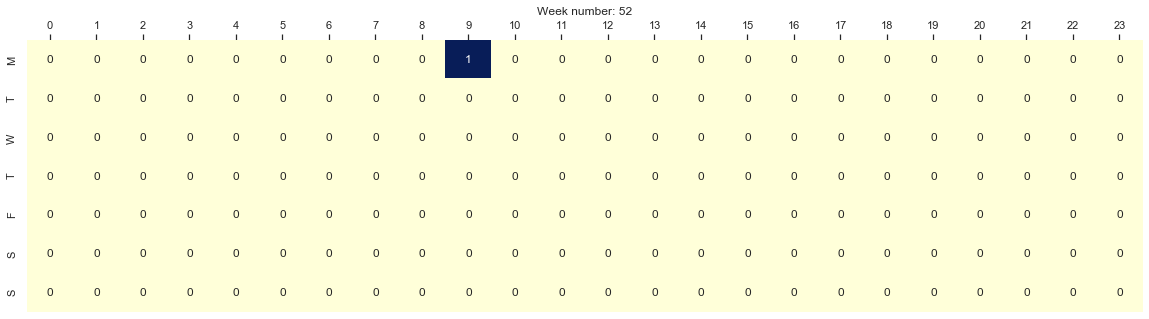

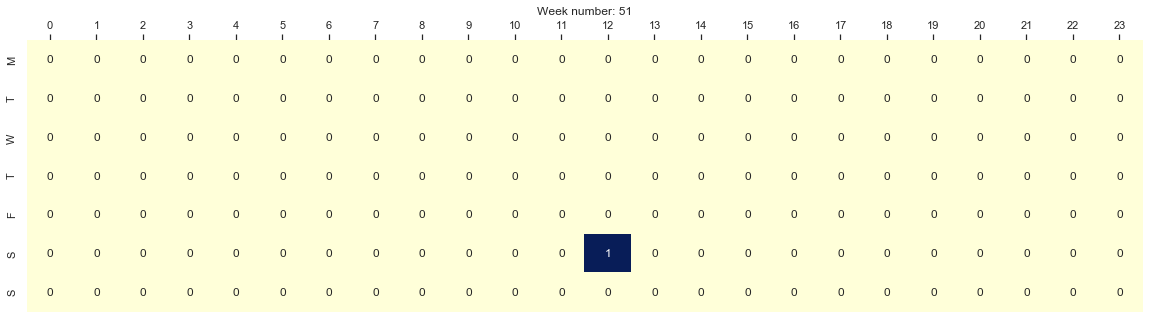

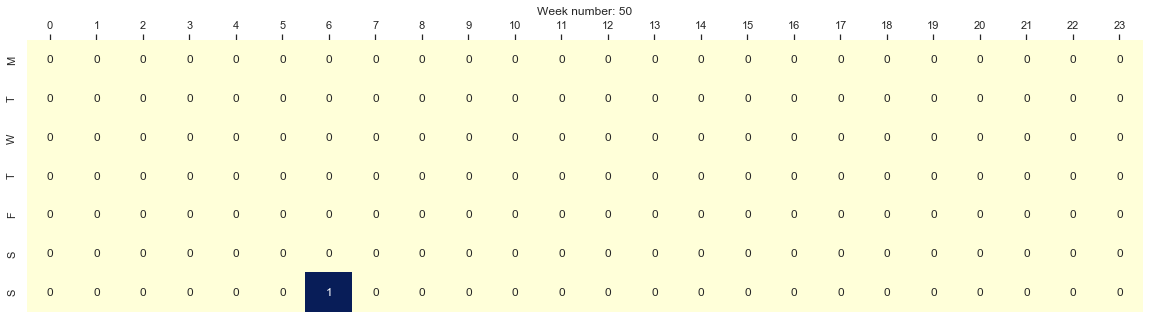

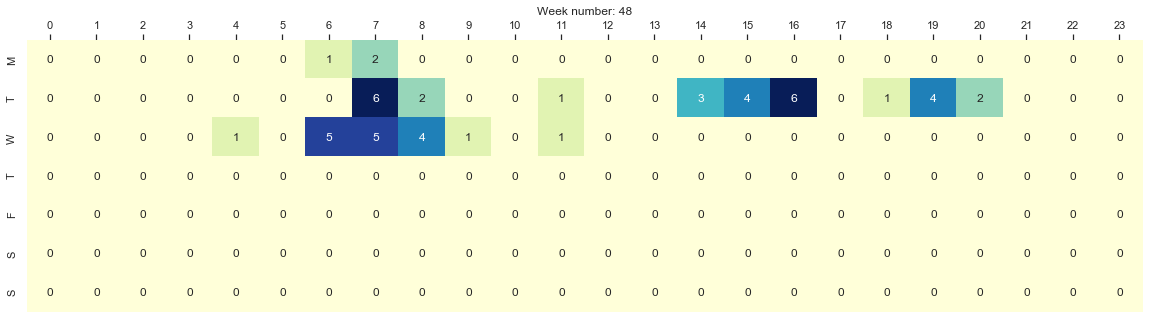

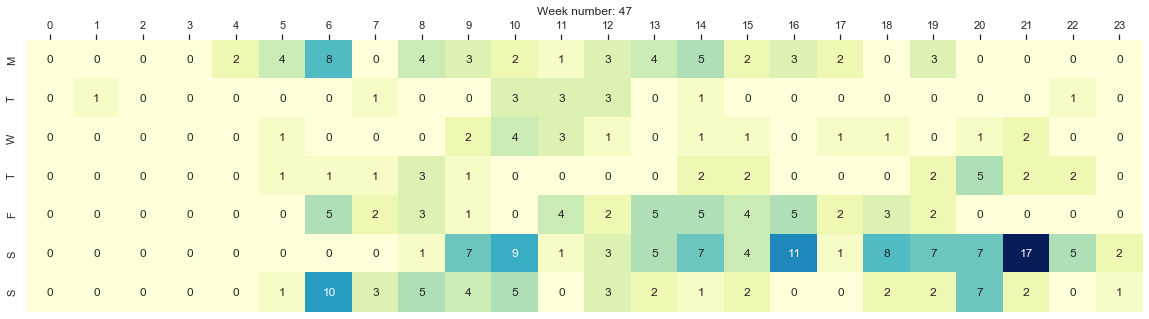

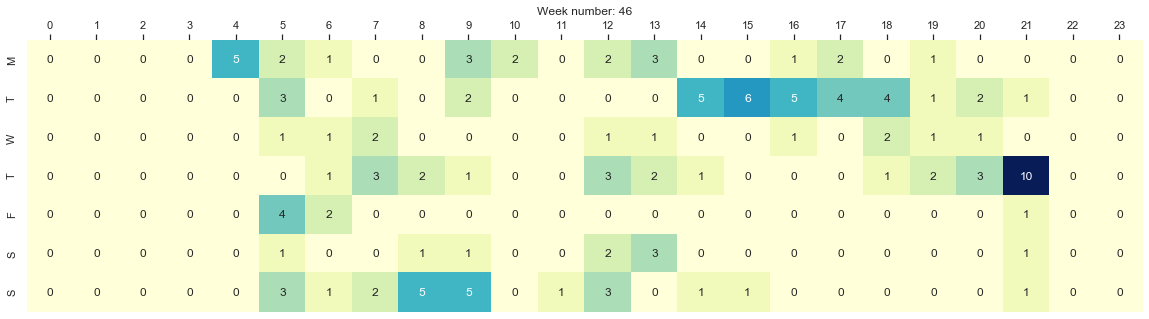

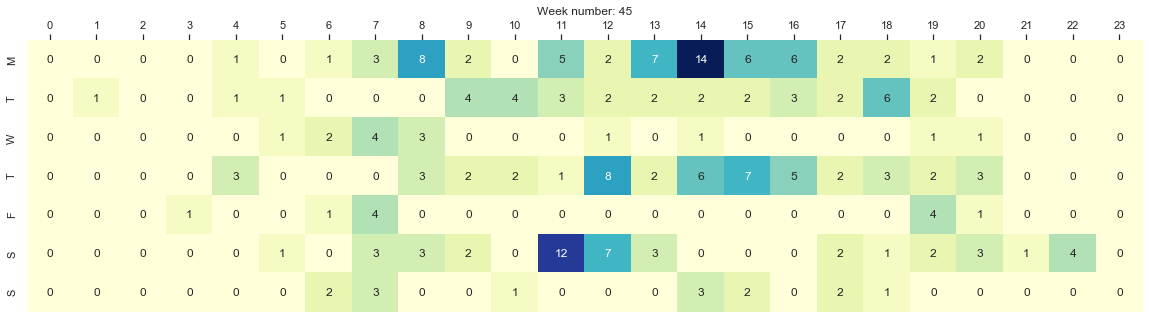

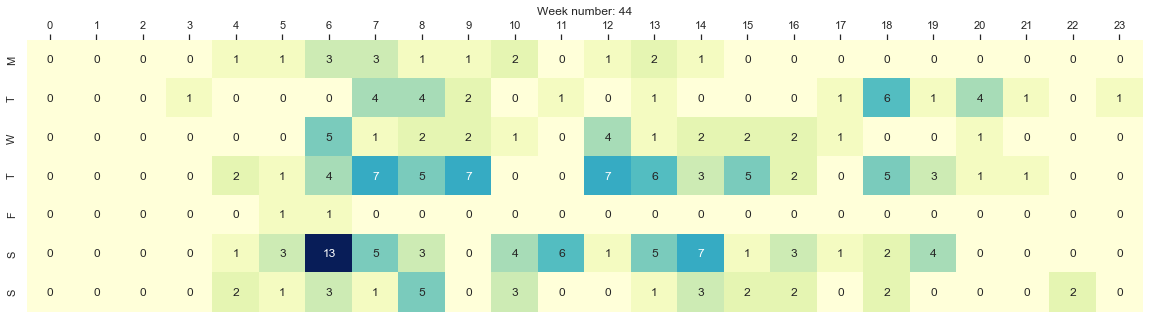

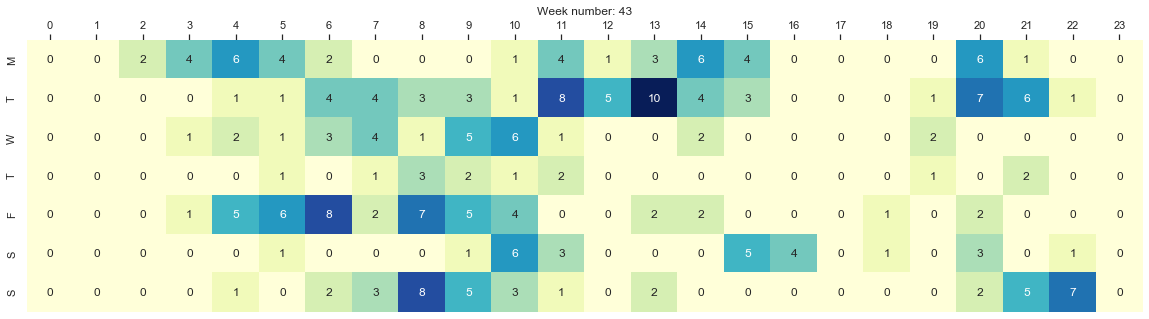

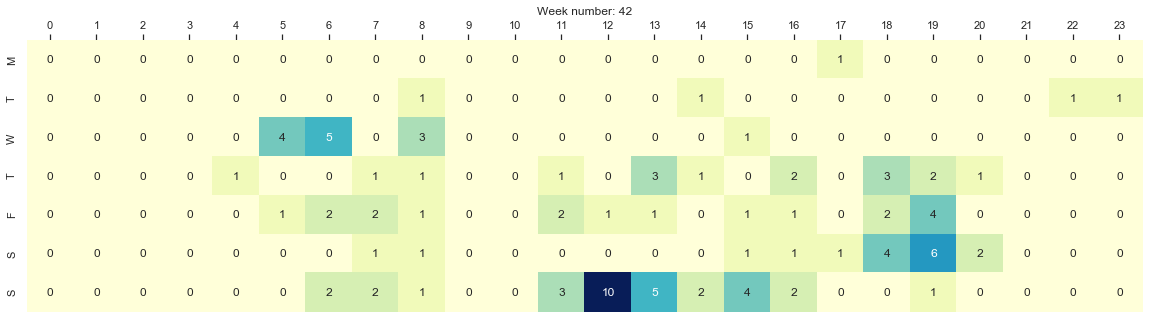

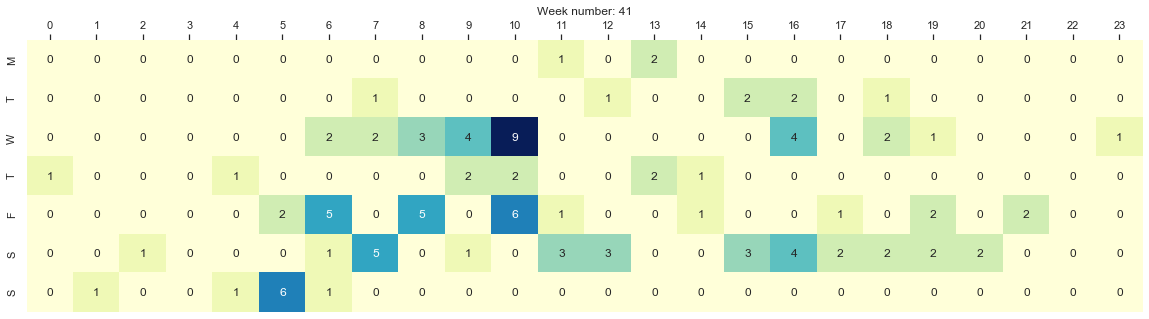

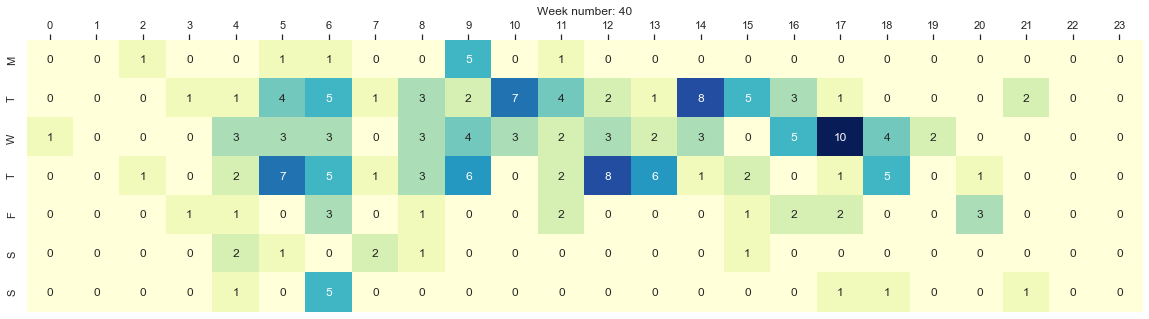

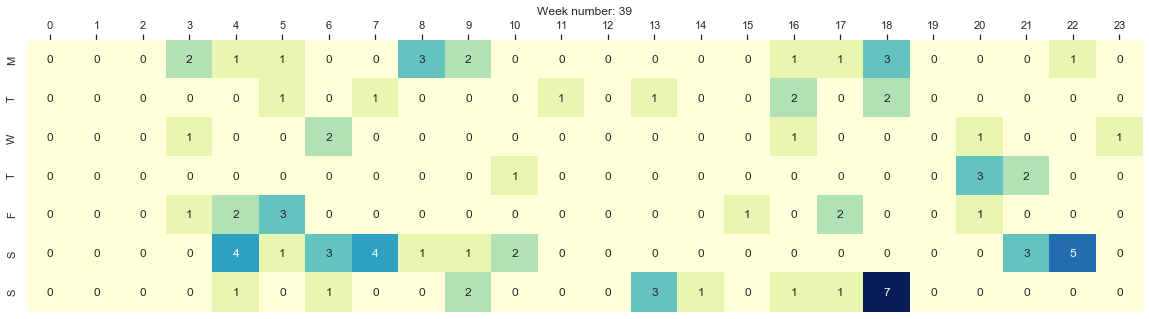

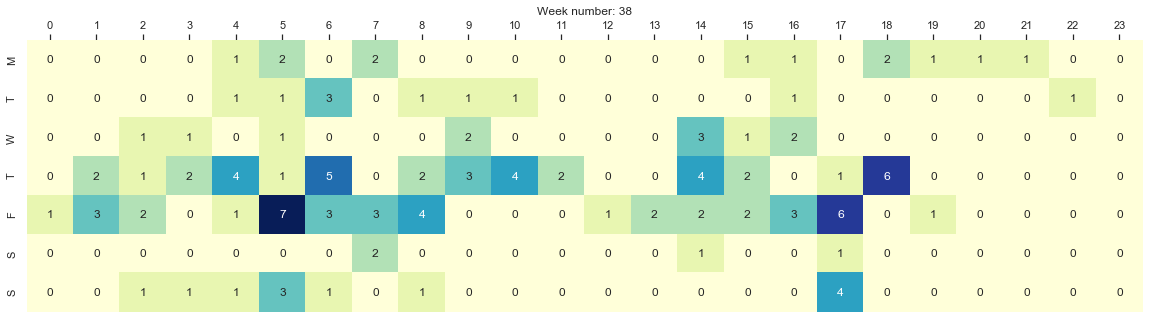

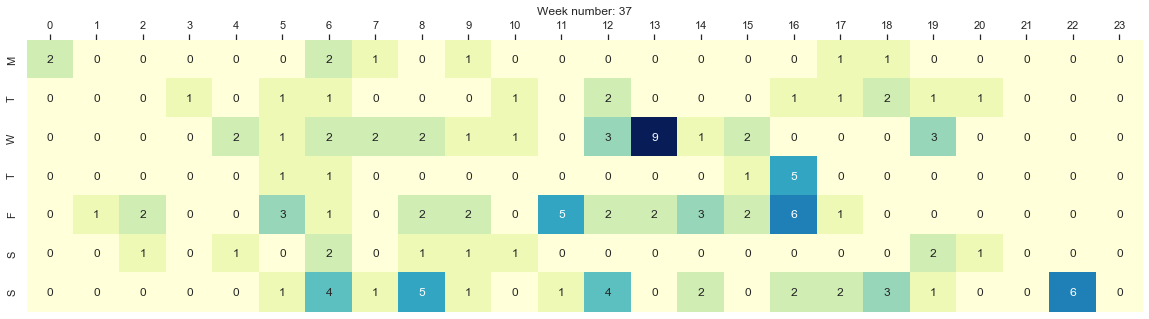

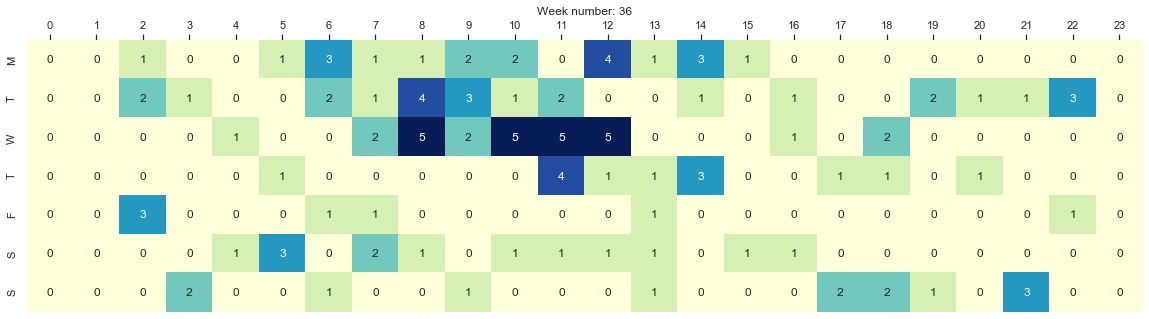

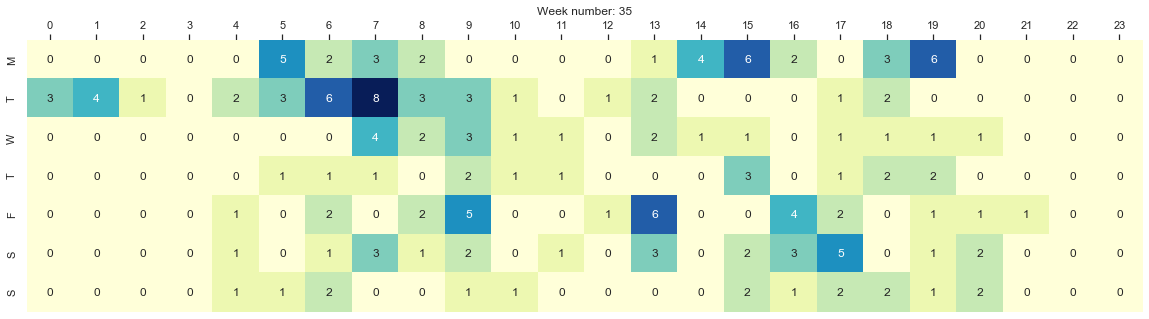

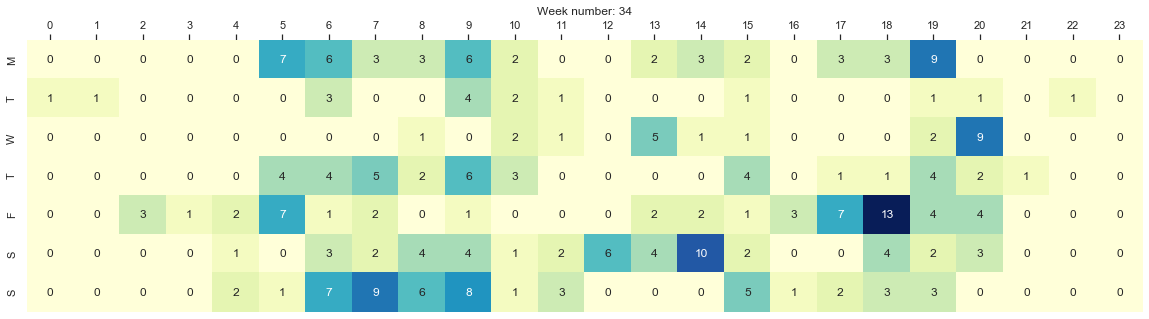

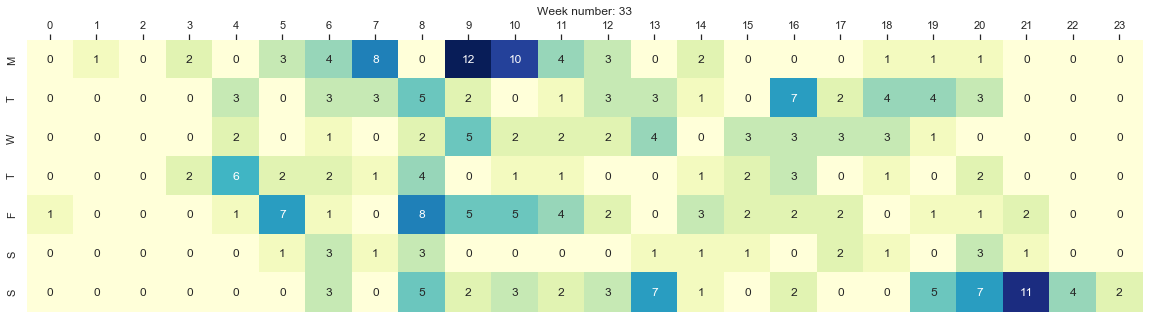

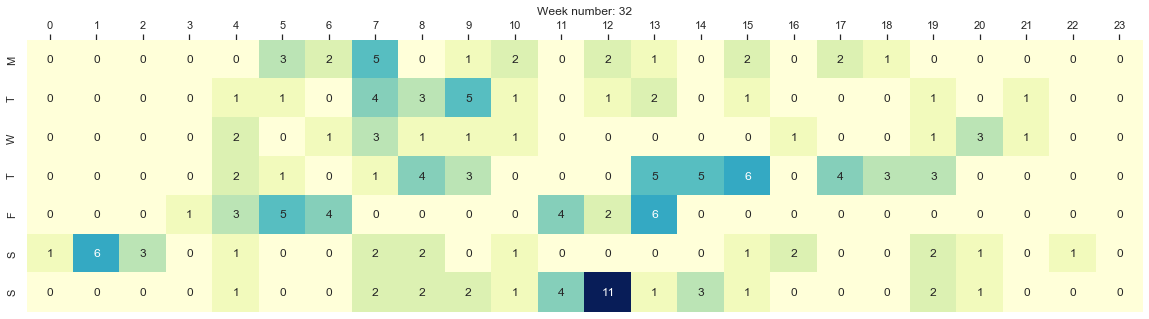

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set(style="whitegrid")
days = ["M", "T", "W", "T", "F", "S", "S"]
count = 0
for weeknum, htm in sorted(long_hm.items(), reverse=True):
    if count >= 20:
        break
    count += 1
    hm = np.array(htm)
    plt.figure()
    ax = sns.heatmap(hm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, yticklabels=days)
    ax.xaxis.set_ticks_position('top')
    ax.set_title("Week number: " + str(weeknum))

In [26]:
print("Sources - where the tweet originated")
print("This field can be used to occasionally identify accounts that use standard automation services such as IFTTT")
print()
print_counter(counters["sources"], 100)

Sources - where the tweet originated
This field can be used to occasionally identify accounts that use standard automation services such as IFTTT

3079	Twitter Web App
76	Twitter Web Client


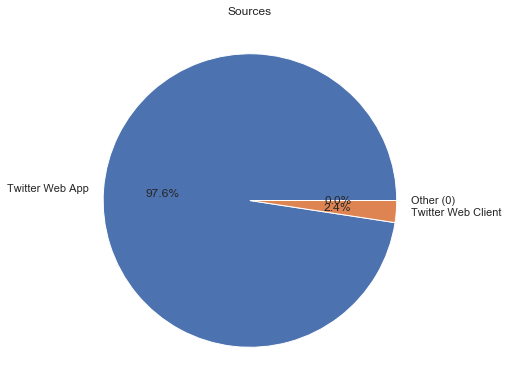

In [27]:
# Show source fields
cluster_hts = counters["sources"]

plot_data = {}
plot_data["labels"] = []
plot_data["sizes"] = []

n = 25
other = 0
otherc = 0
for ht, c in cluster_hts.most_common():
    if len(plot_data["labels"]) <= n:
        plot_data["labels"].append(ht)
        plot_data["sizes"].append(c)
    else:
        otherc += 1
        other += c
plot_data["labels"].append("Other (" + str(other) + ")")
plot_data["sizes"].append(other)

fig = plt.figure(figsize=(9,5))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("Sources")
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

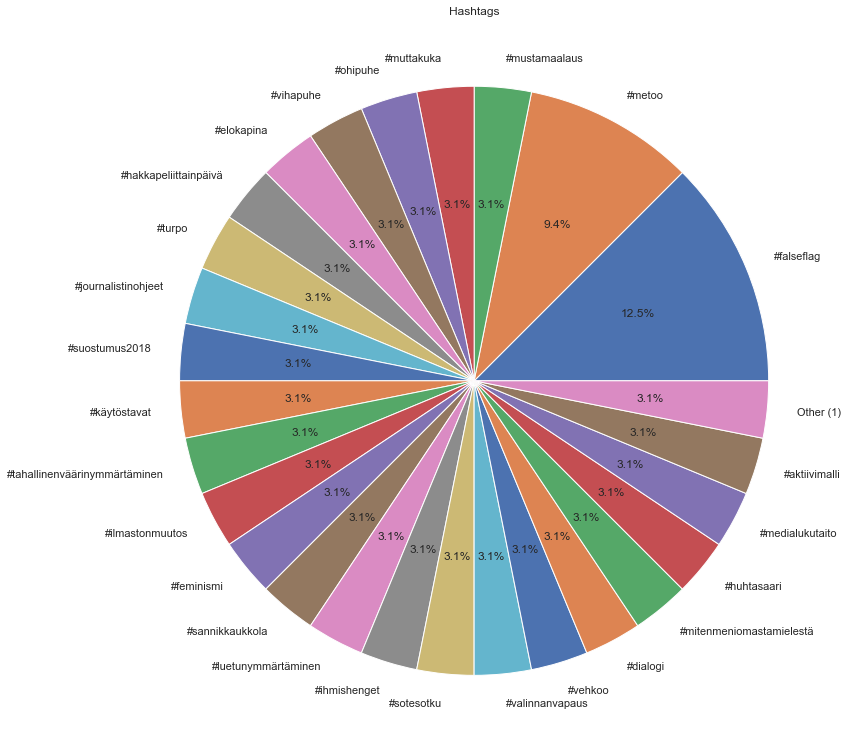

In [28]:
# Show some hashtags
cluster_hts = counters["hashtags"]

plot_data = {}
plot_data["labels"] = []
plot_data["sizes"] = []

n = 25
other = 0
otherc = 0
for ht, c in cluster_hts.most_common():
    if len(plot_data["labels"]) <= n:
        plot_data["labels"].append("#" + ht)
        plot_data["sizes"].append(c)
    else:
        otherc += 1
        other += c
plot_data["labels"].append("Other (" + str(other) + ")")
plot_data["sizes"].append(other)

fig = plt.figure(figsize=(18,10))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("Hashtags")
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

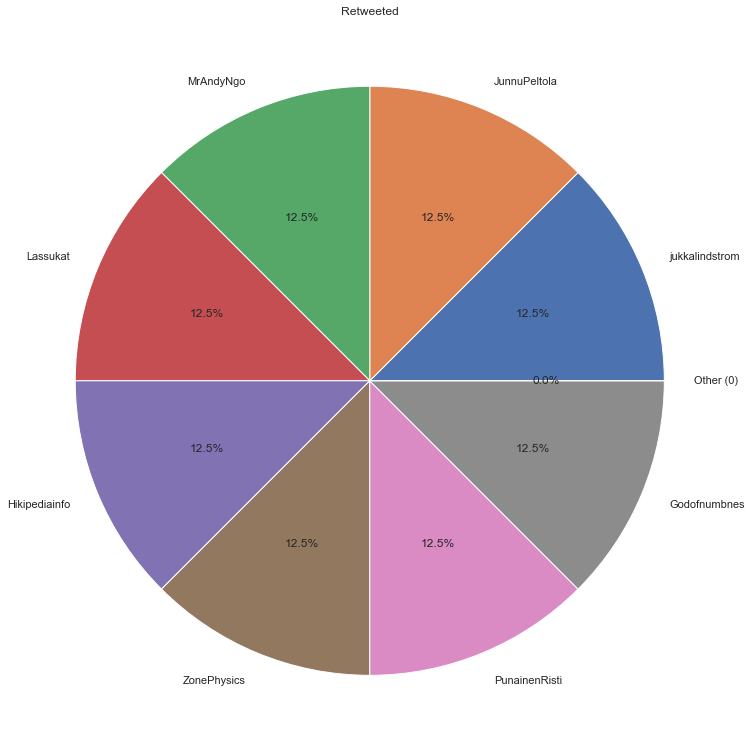

In [29]:
# Show some hashtags
cluster_hts = counters["retweeted"]

plot_data = {}
plot_data["labels"] = []
plot_data["sizes"] = []

n = 25
other = 0
otherc = 0
for ht, c in cluster_hts.most_common():
    if len(plot_data["labels"]) <= n:
        plot_data["labels"].append(ht)
        plot_data["sizes"].append(c)
    else:
        otherc += 1
        other += c
plot_data["labels"].append("Other (" + str(other) + ")")
plot_data["sizes"].append(other)

fig = plt.figure(figsize=(18,10))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("Retweeted")
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

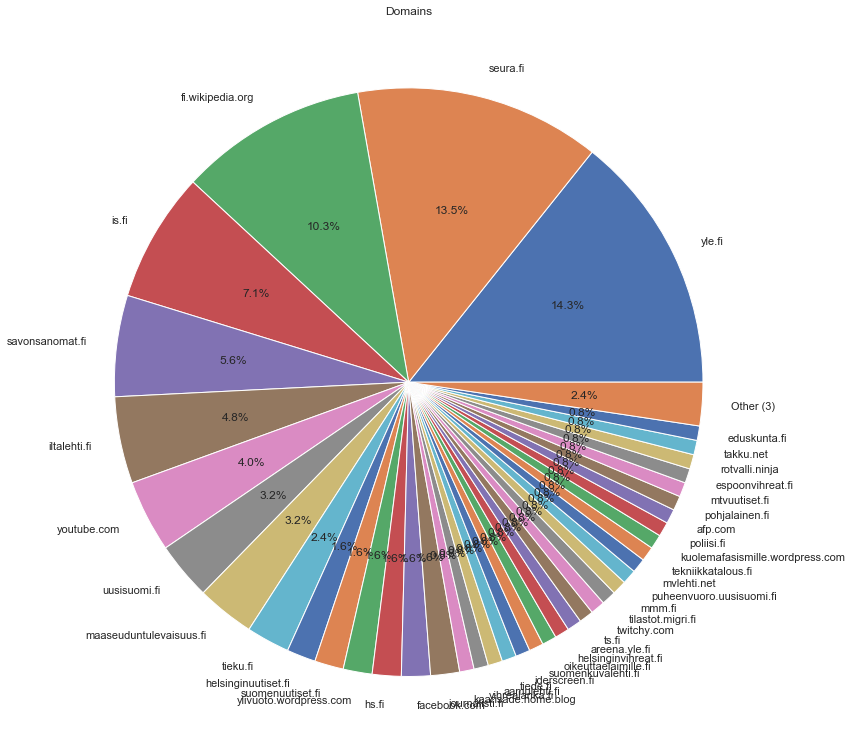

In [30]:
# Show some url domains
domains = counters["domains"]
cluster_hts = domains
plot_data = {}
plot_data["labels"] = []
plot_data["sizes"] = []

n = 40
other = 0
otherc = 0
for ht, c in cluster_hts.most_common():
    if len(plot_data["labels"]) <= n:
        plot_data["labels"].append(ht)
        plot_data["sizes"].append(c)
    else:
        otherc += 1
        other += c
plot_data["labels"].append("Other (" + str(other) + ")")
plot_data["sizes"].append(other)

fig = plt.figure(figsize=(18,10))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("Domains")
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

In [31]:
follower_dets_fn = os.path.join(dirname, "follower_details.json")
follower_details = []
if os.path.exists(follower_dets_fn):
    print("Loading follower details from: " + follower_dets_fn)
    follower_details = load_json(follower_dets_fn)
else:
    print("Retrieving followers from Twitter")
    follower_details = get_follower_data_sn(target)
    save_json(follower_details, follower_dets_fn)
print("Found: " + str(len(follower_details)) + " followers.")

Retrieving followers from Twitter
Found: 23 followers.


Text(0.5, 1.0, 'Ages of accounts that follow: HalmeRauno')

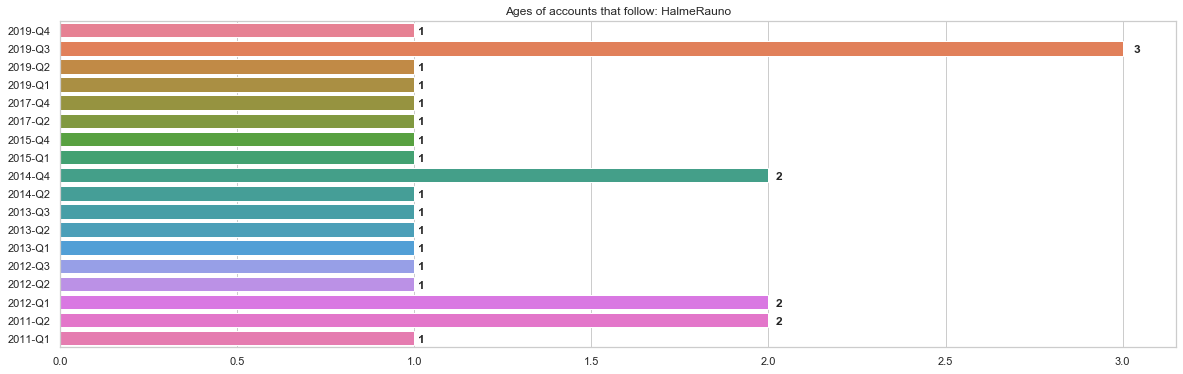

In [32]:
# Show account age distribution
cluster_acct_ages = Counter()
quarters = {"Q1": [1, 2, 3],
            "Q2": [4, 5, 6],
            "Q3": [7, 8, 9],
            "Q4": [10, 11, 12]}
flrtw = Counter()
for d in follower_details:
    flrtw[d["screen_name"]] += 1
    if "created_at" in d:
        ca = d["created_at"]
        yr = ca[-4:]
        mon = md[ca[4:7]]
        q = ""
        for qname, qvals in quarters.items():
            if int(mon) in qvals:
                q = qname
        day = ca[8:10]
        #ds = str(yr) + "-" + str(mon)
        ds = str(yr) + "-" + q
        cluster_acct_ages[ds] += 1
plot_data = {}
plot_data["labels"] = []
plot_data["counts"] = []
for label, count in sorted(cluster_acct_ages.items(), reverse=True):
    plot_data["labels"].append(label)
    plot_data["counts"].append(count)
plot_data = trim_plot_data(plot_data, 0, 50)
height = len(plot_data["counts"])/3
sns.set(rc={'figure.figsize':(20,height)})
sns.set(style="whitegrid")
plt.figure()
ax = sns.barplot(x="counts", y="labels", palette="husl", data=plot_data)
for i, v in enumerate(plot_data["counts"]):
    pad = min(1.0, v/100)
    ax.text(v+pad, i+0.25, str(v), fontweight='bold')
ax.set_title("Ages of accounts that follow: " + target)

In [33]:
print("Field description:")
print("sc = number of tweets published")
print("fl = number of followers")
print("fr = number of accounts following")
print("egg = true, if the account has default profile and profile picture")
print("ca = date account was created")
print()
min_retweets = 1
date_cutoff = "2019_10"
print("Accounts that follow " + target + " that were created after " + date_cutoff)
s = print_alt_summary_list(follower_details, flrtw, min_retweets=min_retweets, date_cutoff=date_cutoff)

Field description:
sc = number of tweets published
fl = number of followers
fr = number of accounts following
egg = true, if the account has default profile and profile picture
ca = date account was created

Accounts that follow HalmeRauno that were created after 2019_10
User                                            | sc    | fl    | fr    |egg|  ca        | name
https://twitter.com/jtuksa1		(1)	| 0 	| 5 	| 317	|   | 2019-10-31 | jtuksa


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


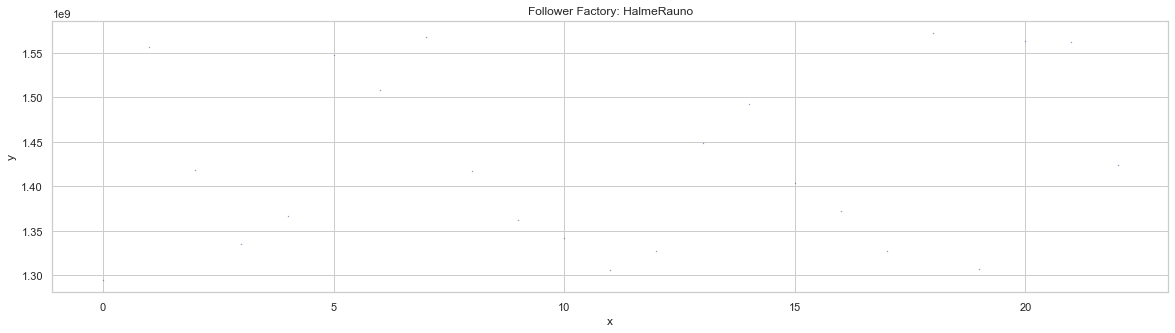

In [34]:
# Follower factory plot
plot_data = {}
plot_data["index"] = []
plot_data["timestamp"] = []
follower_details_rev = follower_details
follower_details_rev.reverse()
for index, d in enumerate(follower_details):
    ts = twitter_time_to_unix(d["created_at"])
    plot_data["index"].append(index)
    plot_data["timestamp"].append(ts)
df = pd.DataFrame({"x": plot_data["index"],
                   "y": plot_data["timestamp"]})
df.plot.scatter("x", "y", figsize=(20,5), s=0.1, title="Follower Factory: " + target)

In [35]:
friends_dets_fn = os.path.join(dirname, "friends_details.json")
friends_details = []
if os.path.exists(friends_dets_fn):
    print("Loading friends details from: " + friends_dets_fn)
    friends_details = load_json(friends_dets_fn)
else:
    print("Retrieving friends from Twitter")
    friends_details = get_friends_data_sn(target)
    save_json(friends_details, friends_dets_fn)
print("Found: " + str(len(friends_details)) + " friends.")

Retrieving friends from Twitter
Found: 11 friends.


Text(0.5, 1.0, 'Ages of accounts that : HalmeRauno follows.')

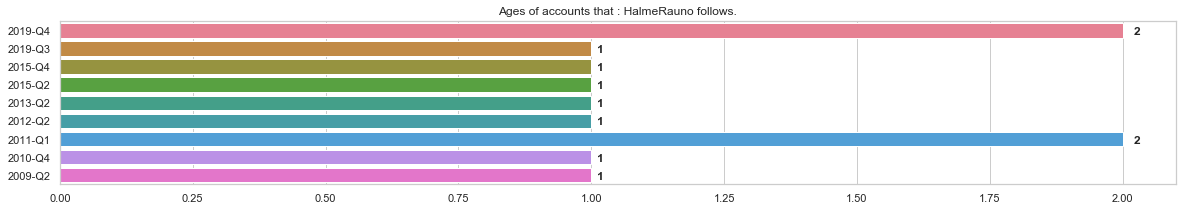

In [36]:
# Show account age distribution
cluster_acct_ages = Counter()
quarters = {"Q1": [1, 2, 3],
            "Q2": [4, 5, 6],
            "Q3": [7, 8, 9],
            "Q4": [10, 11, 12]}
frrtw = Counter()
for d in friends_details:
    frrtw[d["screen_name"]] += 1
    if "created_at" in d:
        ca = d["created_at"]
        yr = ca[-4:]
        mon = md[ca[4:7]]
        q = ""
        for qname, qvals in quarters.items():
            if int(mon) in qvals:
                q = qname
        day = ca[8:10]
        ds = str(yr) + "-" + q
        cluster_acct_ages[ds] += 1
plot_data = {}
plot_data["labels"] = []
plot_data["counts"] = []
for label, count in sorted(cluster_acct_ages.items(), reverse=True):
    plot_data["labels"].append(label)
    plot_data["counts"].append(count)
plot_data = trim_plot_data(plot_data, 0, 50)
height = len(plot_data["counts"])/3
sns.set(rc={'figure.figsize':(20,height)})
sns.set(style="whitegrid")
plt.figure()
ax = sns.barplot(x="counts", y="labels", palette="husl", data=plot_data)
for i, v in enumerate(plot_data["counts"]):
    pad = min(1.0, v/100)
    ax.text(v+pad, i+0.25, str(v), fontweight='bold')
ax.set_title("Ages of accounts that : " + target + " follows.")

In [37]:
min_retweets = 1
date_cutoff = "2019_10"
print("Accounts that " + target + " follows that were created after " + date_cutoff)
s = print_alt_summary_list(friends_details, frrtw, min_retweets=min_retweets, date_cutoff=date_cutoff)

Accounts that HalmeRauno follows that were created after 2019_10
User                                            | sc    | fl    | fr    |egg|  ca        | name
https://twitter.com/WVastaranta		(1)	| 235	| 191	| 457	|   | 2019-11-01 | Wille_Vastaranta
https://twitter.com/keijomedia		(1)	| 136	| 3 k	| 0 	|   | 2019-10-09 | Keijo Kaarisade


In [38]:
followerids = set()
followersns = set()
friendids = set()
friendsns = set()
details_dict = {}
for d in follower_details:
    details_dict[d["screen_name"]] = d
    followersns.add(d["screen_name"])
    followerids.add(d["id_str"])
for d in friends_details:
    details_dict[d["screen_name"]] = d
    friendsns.add(d["screen_name"])
    friendids.add(d["id_str"])
union = followersns.union(friendsns)
intersection = followersns.intersection(friendsns)
print(target + " has " + str(len(intersection)) + " followers that are also friends.")
print_sn_list(intersection)

HalmeRauno has 2 followers that are also friends.
https://twitter.com/KoljaKari
https://twitter.com/jekkukissa


Text(0.5, 1.0, 'Ages of accounts that: HalmeRauno follows and followed.')

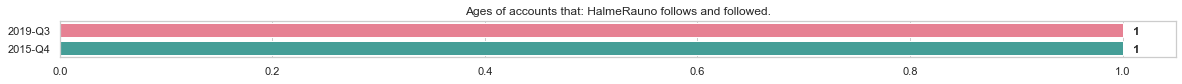

In [39]:
int_details = []
for sn in intersection:
    int_details.append(details_dict[sn])
# Show account age distribution
cluster_acct_ages = Counter()
quarters = {"Q1": [1, 2, 3],
            "Q2": [4, 5, 6],
            "Q3": [7, 8, 9],
            "Q4": [10, 11, 12]}
intrtw = Counter()
for d in int_details:
    intrtw[d["screen_name"]] += 1
    if "created_at" in d:
        ca = d["created_at"]
        yr = ca[-4:]
        mon = md[ca[4:7]]
        q = ""
        for qname, qvals in quarters.items():
            if int(mon) in qvals:
                q = qname
        day = ca[8:10]
        #ds = str(yr) + "-" + str(mon)
        ds = str(yr) + "-" + q
        cluster_acct_ages[ds] += 1
plot_data = {}
plot_data["labels"] = []
plot_data["counts"] = []
for label, count in sorted(cluster_acct_ages.items(), reverse=True):
    plot_data["labels"].append(label)
    plot_data["counts"].append(count)
plot_data = trim_plot_data(plot_data, 0, 50)
height = len(plot_data["counts"])/3
sns.set(rc={'figure.figsize':(20,height)})
sns.set(style="whitegrid")
plt.figure()
ax = sns.barplot(x="counts", y="labels", palette="husl", data=plot_data)
for i, v in enumerate(plot_data["counts"]):
    pad = min(1.0, v/100)
    ax.text(v+pad, i+0.25, str(v), fontweight='bold')
ax.set_title("Ages of accounts that: " + target + " follows and followed.")

In [40]:
min_retweets = 1
date_cutoff = "2019_10"
print("Accounts that both follow and are followed by " + target + " and were created after " + date_cutoff)
s = print_alt_summary_list(int_details, intrtw, min_retweets=min_retweets, date_cutoff=date_cutoff)

Accounts that both follow and are followed by HalmeRauno and were created after 2019_10
User                                            | sc    | fl    | fr    |egg|  ca        | name
